# Louvain Hierarchy

This notebook illustrates the embedding of a graph by the hierarchical Louvain algorithm. 

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.embedding import HLouvainEmbedding, BiHLouvainEmbedding
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

ImportError: cannot import name 'HLouvainEmbedding' from 'sknetwork.embedding' (/Users/thomas/opt/anaconda3/lib/python3.8/site-packages/sknetwork/embedding/__init__.py)

## Graphs

In [ ]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
labels = graph.labels

In [4]:
louvain = HLouvainEmbedding(2)
embedding = louvain.fit_transform(adjacency)
embedding.shape

(34, 2)

In [5]:
image = svg_graph(adjacency, embedding, labels=labels)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


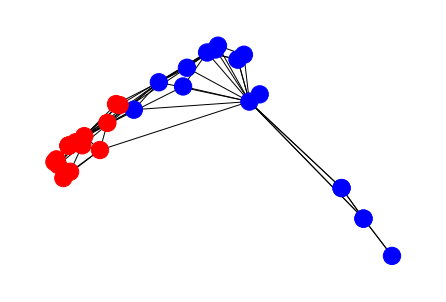

In [6]:
SVG(image)

## Digraphs

In [19]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [20]:
bilouvain = BiHLouvainEmbedding(2)
embedding = bilouvain.fit_transform(adjacency)
embedding.shape

BiSpectral(n_components=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=False, solver='auto')

In [22]:
image = svg_digraph(adjacency, embedding, names=names)

In [23]:
SVG(image)

## Bigraphs

In [26]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [27]:
bilouvain = BiHLouvainEmbedding()
bilouvain.fit(biadjacency)

BiSpectral(n_components=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=False, solver='auto')

In [28]:
embedding_row = bilouvain.embedding_row_
embedding_row.shape

(15, 2)

In [29]:
embedding_col = bilouvain.embedding_col_
embedding_col.shape

(16, 2)

In [30]:
image = svg_bigraph(biadjacency, names_row, names_col, 
                    position_row=embedding_row, position_col=embedding_col,
                    color_row='blue', color_col='red')

In [31]:
SVG(image)